In [1]:
from skimage import io
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
'''Load the image and check its shape'''
image = io.imread('parents.png') # Load the image
print(f"Image is of type: {type(image)}\nThis image has a shape: {image.shape}") # shape is the dimensions of the image

Image is of type: <class 'numpy.ndarray'>
This image has a shape: (1514, 2018, 3)


#### This shape indicates the image is 1514 pixels wide, 2018 pixels tall, and has 3 channels (RGB).

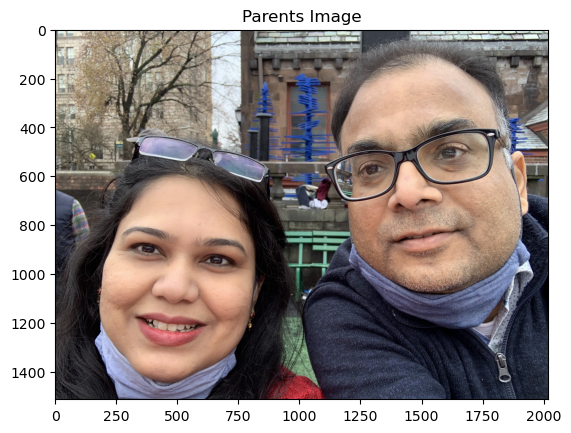

In [3]:
'''Display the image and plot it'''
plt.imshow(image) # Display the image
plt.title(label='Parents Image') # Set the title of the plot
plt.show() # Show the image

In [4]:
'''Normalize the image'''
img_normalized = image / 255.0 # Normalize the image
print(f"The image has the largest pixel value of 255 and we can normalize the image data by dividing by 255:\n{img_normalized}")

The image has the largest pixel value of 255 and we can normalize the image data by dividing by 255:
[[[0.47058824 0.47843137 0.43529412]
  [0.48627451 0.49411765 0.45098039]
  [0.49803922 0.50196078 0.47058824]
  ...
  [0.90980392 0.97647059 0.95294118]
  [0.90980392 0.96862745 0.94901961]
  [0.90980392 0.96862745 0.94901961]]

 [[0.43921569 0.44705882 0.39607843]
  [0.46666667 0.4745098  0.43137255]
  [0.48235294 0.48235294 0.45098039]
  ...
  [0.89803922 0.96470588 0.94117647]
  [0.90980392 0.96862745 0.94901961]
  [0.90980392 0.96862745 0.94901961]]

 [[0.41568627 0.42352941 0.38039216]
  [0.44313725 0.44313725 0.40392157]
  [0.4745098  0.4745098  0.44313725]
  ...
  [0.89803922 0.96078431 0.94901961]
  [0.90980392 0.96862745 0.95686275]
  [0.90980392 0.96862745 0.95686275]]

 ...

 [[0.22745098 0.22352941 0.24313725]
  [0.2        0.19607843 0.21568627]
  [0.18039216 0.17647059 0.19607843]
  ...
  [0.18039216 0.20392157 0.25098039]
  [0.0627451  0.08627451 0.13333333]
  [0.0509803

In [5]:
'''Reshape the image'''
pixels_per_channel = image.shape[0] * image.shape[1] # Get the number of pixels per channel (height x width)
print(f"{pixels_per_channel} pixels per channel") # Number of pixels per channel
reshaped_image = img_normalized.reshape(pixels_per_channel, 3) # Reshape the image to have 3 channels
print(reshaped_image, reshaped_image.shape) # Display the reshaped image

3055252 pixels per channel
[[0.47058824 0.47843137 0.43529412]
 [0.48627451 0.49411765 0.45098039]
 [0.49803922 0.50196078 0.47058824]
 ...
 [0.14901961 0.17254902 0.21960784]
 [0.16078431 0.18431373 0.23137255]
 [0.1372549  0.16078431 0.20784314]] (3055252, 3)


In [6]:
'''Scale the reshaped image'''
scaler = StandardScaler() # Create a StandardScaler object
scaled_image = scaler.fit_transform(reshaped_image) # Scale the reshaped image
print(f"Scaled Reshaped Image Data:\n\n{scaled_image}") # Display the scaled DataFrame

Scaled Reshaped Image Data:

[[ 0.01039136  0.2582135   0.1512284 ]
 [ 0.06556666  0.32246904  0.22315267]
 [ 0.10694814  0.35459681  0.31305801]
 ...
 [-1.12070233 -0.99476947 -0.83773032]
 [-1.07932086 -0.94657782 -0.78378712]
 [-1.16208381 -1.04296113 -0.89167352]]


In [7]:
'''Fit the reshaped data using KMeans'''
# Fit model on original scaled data to generate 3 cluster centers (centroids) and cluster numbers to the data points
kmeans = KMeans(n_clusters=4, random_state=0).fit(scaled_image)
# Gives us the coordinates of the 3 cluster centers (centroids)
print(f"These are the n-dimensional coordinates of the 4 centroids:\n{kmeans.cluster_centers_}")
# Gives us the cluster number each data point belongs to
print(f"These are the cluster number each data point belongs to:\n\n{kmeans.labels_}")

These are the n-dimensional coordinates of the 4 centroids:
[[ 0.58926267  0.53826935  0.43842089]
 [-0.40827348 -0.38883435 -0.31573371]
 [-1.24843411 -1.27403547 -1.23136812]
 [ 1.32625137  1.39995646  1.37971489]]
These are the cluster number each data point belongs to:

[0 0 0 ... 2 2 2]


In [8]:
'''Define the 4 colors for the 4 clusters'''
colors = np.array([
    [255, 0, 0],   # Red
    [0, 0, 0],     # Black
    [0, 255, 0],   # Green
    [0, 0, 255],   # Blue
    [255, 255, 0]  # Yellow
])/255.0 # Normalize the colors

In [9]:
'''Replace the reshaped pixels with kmeans.labels_ having the same color'''
segmented_image = colors[kmeans.labels_]

In [10]:
'''Reshape the segmented image to the shape of the original image'''
segmented_image = segmented_image.reshape(image.shape)

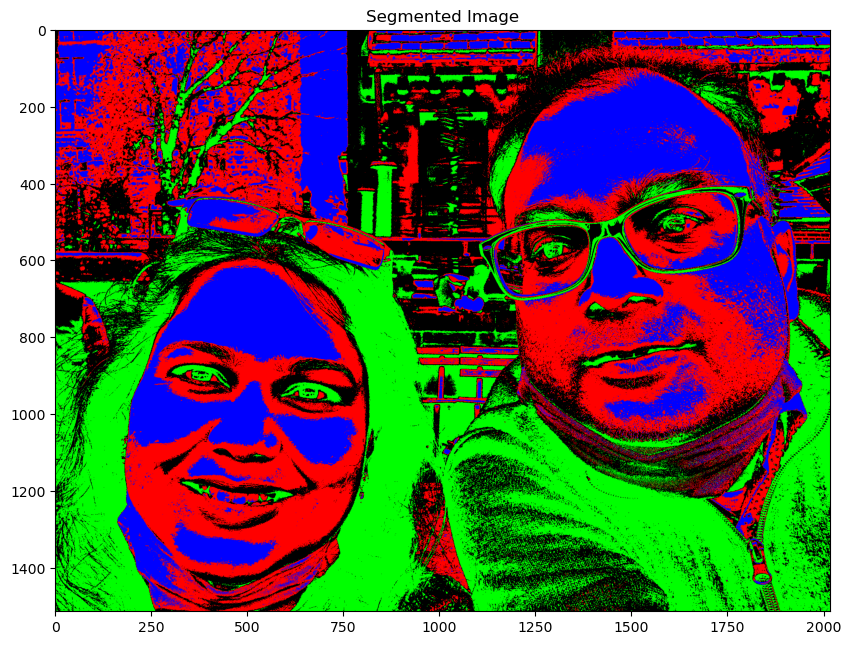

In [11]:
'''Plot the segmented image'''
plt.figure(figsize=(10, 10))
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.show()